In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [60]:
data = pd.read_csv('/content/drive/MyDrive/full.regular.txt', delim_whitespace=True)

In [61]:
y = data.iloc[:, 2]
X = data.iloc[:, 3:11]

In [62]:
y = y.iloc[0:1000]
y = y.values
X = X.iloc[0:1000,0:]
X = X.values


In [ ]:
X_samll = X.iloc[0:100,0:]
y_samll = y.iloc[0:100]

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

# Create an instance of the classifier
classifier = LogisticRegression()
#classifier = RandomForestClassifier(n_estimators = 64,
#                                    #max_features = 30,
#                                    bootstrap = True,
#                                    random_state = None)

#clf = forest
#clf.fit(X_trainOhFeatures, y_train)
#predictions = clf.predict(X_testOhFeatures)
#accuracy = accuracy_score(y_test, predictions)
particleScore = list()
particleSize = list()

# Define objective function
def f_per_particle(m, alpha):
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    ##https://github.com/ahcantao/PSOFeatureSelection/blob/master/feature_subset_selection.ipynb
    total_features = X.shape[1]
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        #if the particle subset is only zeros, get the original set of attributes
        X_subset = X
    else:
        X_subset = X[:,m==1]

    #X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.20, random_state=None)
    # Perform classification and store performance in P
    #classifier.fit(X_train, y_train)
    #P = (classifier.predict(X_test) == y_test).mean()
    #P = (classifier.predict(X_test) == y_test).mean()

    scores = cross_val_score(classifier, X_subset, y, cv=3)
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    P = scores.mean()
    particleScore.append(P)
    particleSize.append(X_subset.shape[1])
    # Compute for the objective function
    j = (alpha * (1.0 - P)+ (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    #j = (alpha * (1.0 - P)) + (1 - alpha) * (1 - (total_features - X_subset.shape[1]) / total_features)
    #print("Particle j: ", j)
    return j

In [8]:
def f(x, alpha=0.9):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    #print("f j: ", j)
    return np.array(j)

In [13]:
!pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.4 MB/s eta 0:00:00


In [16]:
!pip install pyswarms==0.1.9

  Using cached pyswarms-0.1.9-py2.py3-none-any.whl (54 kB)
  Using cached PyYAML-3.12.zip (375 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [15]:
import pyswarms as ps

In [23]:
from datetime import datetime as dt
import time
#from pyswarms.utils.environments import PlotEnvironment
import matplotlib.pyplot as plt

start = dt.now()
print("Started at: ", str(start))
particleScore = list()
particleSize = list()
#mySubsets = list()

# Initialize swarm, arbitrary
options = {'c1': 1, 'c2': 1, 'w':0.5, 'k': 100, 'p':20}

# Call instance of PSO
dimensions = X.shape[1] # dimensions should be the number of features
#optimizer.reset()
print(dimensions)
#optimizer = ps.single.GlobalBestPSO(n_particles=1, dimensions=dimensions,
#                                    options=options)
optimizer = ps.discrete.BinaryPSO(n_particles=100, dimensions=dimensions, options=options)

# Perform optimization
#cost, pos = optimizer.optimize(f, print_step=1, iters=10, verbose=2)


# Initialize plot environment
#plt_env = PlotEnvironment(optimizer, f, 10)

# Plot the cost
#plt_env.plot_cost(figsize=(8,6));
#plt.show()


#print(cost,pos)
end = dt.now()
print("Finished at: ", str(end))
total = end-start
print("Total time spent: ", total)

Started at:  2024-05-26 07:44:50.761369
8
Finished at:  2024-05-26 07:44:50.770248
Total time spent:  0:00:00.008879


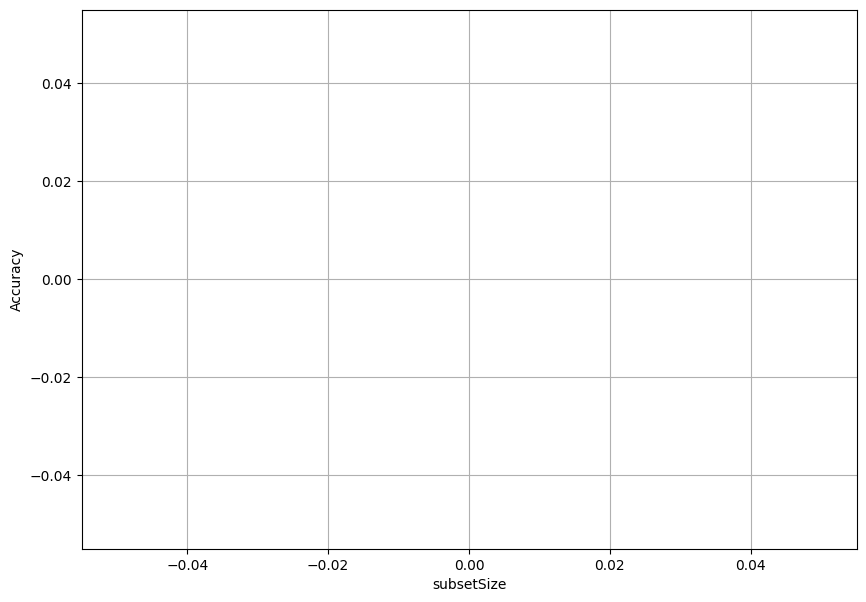

In [24]:
import matplotlib.pyplot as plt #MatPlotLib usado para desenhar o gráfico criado com o NetworkX

#iterations = list(range(1,len(optimizer.get_cost_history)+1))
plt.figure(figsize=(10,7))
#plt.xlabel('2^i classes')
plt.xlabel('subsetSize')
plt.ylabel('Accuracy')
plt.plot(particleSize, particleScore, 'bo')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)

In [26]:
import tensorflow as tf
from tensorflow import keras

In [75]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[8, 1]))
model.add(keras.layers.Dense(32, activation="swish"))
model.add(keras.layers.Dense(128, activation="swish"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [64]:
target_encoding = []
for x in y:
  if x == "H":
    target_encoding.append([1, 0, 0])
  elif x == "C":
    target_encoding.append([0, 1, 0])
  else:
      target_encoding.append([0, 0, 1])
target_encoding = np.array(target_encoding)

In [65]:
print(X.shape)

(1000, 8)


In [66]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 64)                576       
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 843 (3.29 KB)
Trainable params: 843 (3.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
import numpy as np
X_tensor = np.array(X).reshape(X.shape[0],X.shape[1],1)

In [68]:
print(X_tensor.shape)

(1000, 8, 1)


In [69]:
target_encoding.shape

(1000, 3)

In [70]:
weights, biases =  model.layers[1].get_weights()


In [71]:
print(weights)

[[ 0.43901896 -0.29309177  0.4611948  -0.09947325  0.31329536 -0.80038214
  -0.18673456  0.53476834]
 [ 0.4680684   0.4302351   0.01828357 -0.6316445   0.4285564   0.65774304
   0.37799     0.36489993]
 [-0.10001465  0.25542697 -0.66682     0.71412724 -0.546817    0.4443436
   0.3180864   0.03801296]
 [-0.17684807 -0.55764395  0.03749072 -0.11523357  0.55256104  0.3514118
  -0.1465283   0.434371  ]
 [ 0.46163613  0.60300237  0.46957988  0.22661525 -0.2794009  -0.56705487
   0.3617145  -0.5803699 ]
 [ 0.41367403 -0.17910092 -0.5255326   0.07124326  0.5388039  -0.4228517
   0.14606921 -0.3697111 ]
 [ 0.3596736   0.60939723  0.56173104 -0.26334372 -0.07060191  0.29979324
  -0.6297011  -0.4379769 ]
 [-0.5775482  -0.16163613 -0.23787068  0.00281317  0.59914297 -0.44335532
   0.17780513 -0.09197844]]


In [40]:
weights.shape

(8, 8)

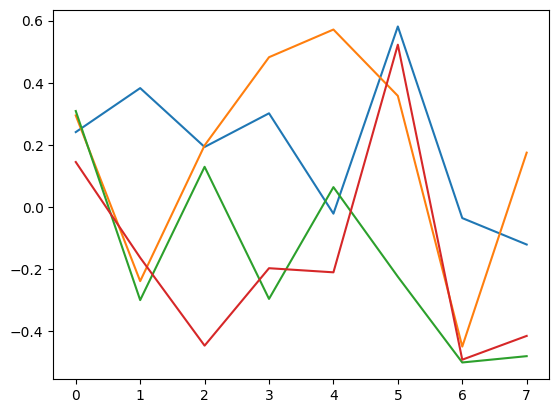

In [44]:
import matplotlib.pyplot as plt
plt.plot(weights[0])
plt.plot(weights[1])
plt.plot(weights[2])
plt.plot(weights[3])

In [76]:
model.compile(loss="categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, target_encoding, test_size=0.30, random_state=0)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(700, 3)
(300, 3)
(700, 8, 1)
(300, 8, 1)


In [78]:
history = model.fit(X_train, y_train, epochs=200,validation_data=(X_test, y_test))

Epoch 1/200
22/22 [==============================] - 1s 19ms/step - loss: 1.0665 - accuracy: 0.4614 - val_loss: 1.0164 - val_accuracy: 0.5800
Epoch 2/200
22/22 [==============================] - 0s 6ms/step - loss: 0.9677 - accuracy: 0.6300 - val_loss: 0.9047 - val_accuracy: 0.6667
Epoch 3/200
22/22 [==============================] - 0s 8ms/step - loss: 0.8920 - accuracy: 0.6514 - val_loss: 0.8364 - val_accuracy: 0.6867
Epoch 4/200
22/22 [==============================] - 0s 6ms/step - loss: 0.8386 - accuracy: 0.6500 - val_loss: 0.7926 - val_accuracy: 0.6833
Epoch 5/200
22/22 [==============================] - 0s 8ms/step - loss: 0.7948 - accuracy: 0.6614 - val_loss: 0.7455 - val_accuracy: 0.7200
Epoch 6/200
22/22 [==============================] - 0s 9ms/step - loss: 0.7662 - accuracy: 0.6643 - val_loss: 0.7309 - val_accuracy: 0.7033
Epoch 7/200
22/22 [==============================] - 0s 8ms/step - loss: 0.7413 - accuracy: 0.6729 - val_loss: 0.7096 - val_accuracy: 0.7233
Epoch 8/200


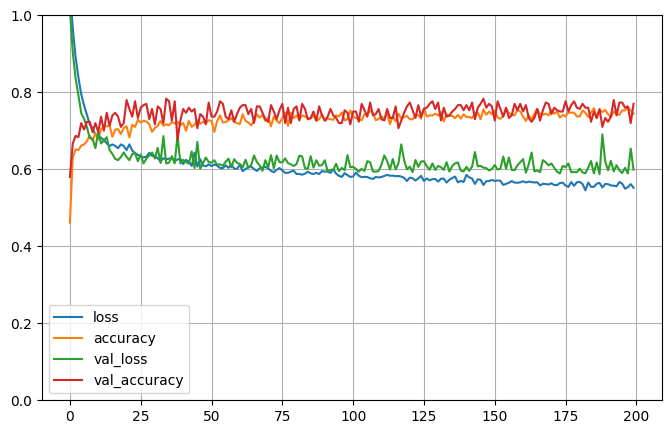

In [79]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
